In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Rescaling

import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
datas=pd.read_csv('labels.csv')

import os



In [2]:
from pathlib import Path
import os
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split

root_path_train = Path('C:/Users/PARTHIPAN/Desktop/python/ml_concepts/Road Signs classification dataset/DATA')
root_path_test  = Path('C:/Users/PARTHIPAN/Desktop/python/ml_concepts/Road Signs classification dataset/TEST')

image_count_train = len(list(root_path_train.glob('*/*.png')))
image_count_test  = len(list(root_path_test.glob('*/*.png')))

img_size = 64

# Automatically get class IDs from folder names
def get_class_ids(path):
    return [folder.name for folder in path.iterdir() if folder.is_dir()]

def load_images(path, class_ids):
    data, labels = [], []
    for class_id in class_ids:
        folder_path = os.path.join(path, str(class_id))
        if not os.path.isdir(folder_path):  
            continue
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv.imread(img_path)
            if img is None:
                continue
            img = cv.resize(img,(img_size, img_size))
            data.append(img)
            labels.append(int(class_id))  # Assuming class folders are named numerically
    return np.array(data)/255.0, np.array(labels)

# Get class IDs from train folder
class_ids = get_class_ids(root_path_train)

x_train, y_train = load_images(root_path_train, class_ids)
x_test, y_test = load_images(root_path_test, class_ids)

# Split train data into train and validation
x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test   = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [3]:
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

train_genrator=datagen.flow(x_train,y_train,batch_size=32)

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(len(datas), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# convert y_train to one-hot
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=len(datas))
y_val_cat = to_categorical(y_val, num_classes=len(datas))

history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=32),
    validation_data=(x_val, y_val_cat),
    epochs=20
)


C:\Users\PARTHIPAN\AppData\Local\Temp\ipykernel_20956\3703393008.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(64, 64, 3))


Epoch 1/20


C:\Users\PARTHIPAN\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.0611 - loss: 4.0235 - val_accuracy: 0.1351 - val_loss: 3.0754
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.2169 - loss: 2.8876 - val_accuracy: 0.2883 - val_loss: 2.5462
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.3092 - loss: 2.3322 - val_accuracy: 0.3874 - val_loss: 2.2071
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4218 - loss: 2.0515 - val_accuracy: 0.4775 - val_loss: 1.9807
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5036 - loss: 1.7287 - val_accuracy: 0.5225 - val_loss: 1.7948
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5756 - loss: 1.4697 - val_accuracy: 0.5045 - val_loss: 1.7538
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5703 - loss: 1.4881 - val_accuracy: 0.5856 - val_loss: 1.5990
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6304 - loss: 1.2277 - val_accuracy: 0.5946 - val_loss: 

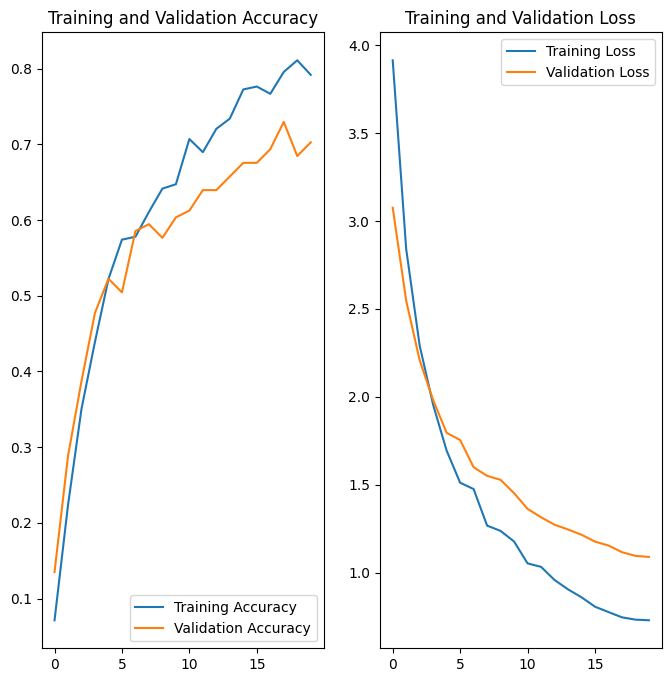

In [5]:




acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)
epochs_range = range(len(acc))

epochs_range = range(len(acc))  # Fix: dynamically match the number of epochs

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()



In [6]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict on test set
y_pred_prob = model.predict(x_test)

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# If y_test is already integer labels (not one-hot), use it as-is
y_true_classes = y_test

# Accuracy
acc = accuracy_score(y_true_classes, y_pred_classes)

# Precision, Recall, F1
prec = precision_score(y_true_classes, y_pred_classes, average='macro')
rec = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f" Accuracy:  {acc:.2f}")
print(f" Precision: {prec:.2f}")
print(f" Recall:    {rec:.2f}")
print(f" F1-score:  {f1:.2f}")

# Classification report
print("\n Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 674ms/step
 Accuracy:  0.75
 Precision: 0.81
 Recall:    0.76
 F1-score:  0.75

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         4
           4       0.50      1.00      0.67         1
           5       1.00      0.50      0.67         2
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         4
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       0.71      1.00      0.83         5
          11       1.00      0.43      0.60         7
          12       1.00      1.00      1.00         2
          13       0.29      0.67      0.40         3
          14       0.67      1.00      0.80         2
   

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


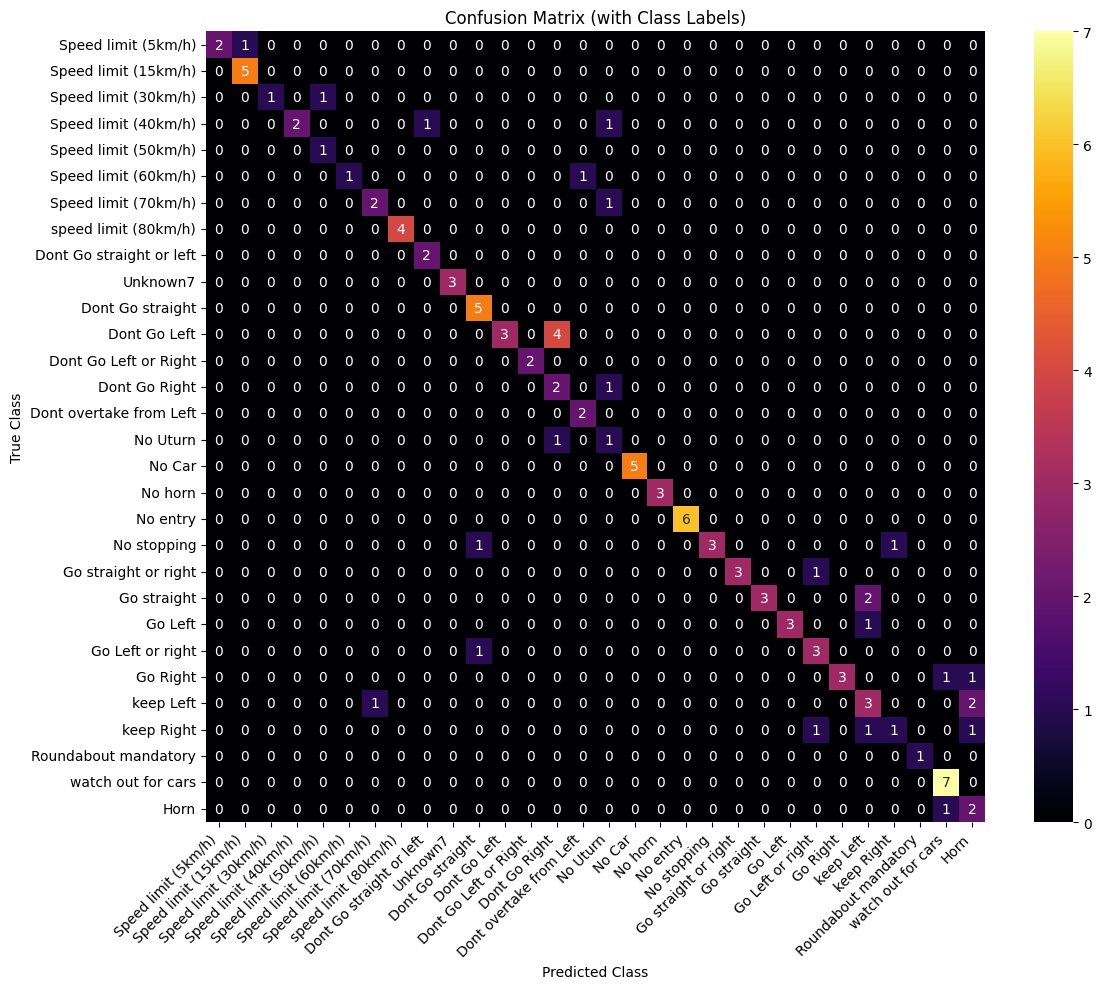

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Get predicted and true class indices
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
# Load label names
import pandas as pd
labels_df = pd.read_csv('labels.csv')
class_names = labels_df.sort_values('ClassId')['Name'].values  # make sure they are in correct order

# Plot with class names
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="inferno", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (with Class Labels)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
model.save("road_sign.h5")

In [9]:
test_img_path = r"C:/Users/PARTHIPAN/Desktop/python/ml_concepts/Road Signs classification dataset/TEST/4/004_0020_j.png"
img = cv.imread(test_img_path)

if img is None:
    print("Image not found or path is wrong!")
else:
    img = cv.resize(img, (64, 64))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Load class name
    labels_df = pd.read_csv('labels.csv')
    class_id_to_name = dict(zip(labels_df['ClassId'], labels_df['Name']))

    print("Predicted class ID:", predicted_class)
    print("Class name:", class_id_to_name[int(predicted_class)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class ID: 15
Class name: No Uturn


In [10]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
model = load_model("road_sign.h5")

# Load label names from CSV
labels_df = pd.read_csv('labels.csv')
class_id_to_name = dict(zip(labels_df['ClassId'], labels_df['Name']))

# Streamlit UI
st.set_page_config(page_title="🚦 Road Sign Classifier", layout="centered")

st.title("🚦 Road Sign Recognition")
st.write("Upload a road sign image and I'll tell you what it means!")

uploaded_file = st.file_uploader("Upload image", type=["jpg", "png", "ppm"])

if uploaded_file is not None:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)

    # Convert image
    img = Image.open(uploaded_file)
    img = img.convert("RGB")
    img = img.resize((64, 64))
    img = np.array(img)
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    class_name = class_id_to_name[int(predicted_class)]

    st.success(f"🧠 Predicted Class: *{class_name}* (Class ID: {predicted_class})")

Overwriting app.py


In [ ]:
import os
os.system("python -m streamlit run app.py")